In [2]:
import dm_den
import rotate_galaxy
import cropper
import numpy as np

In [26]:
import matplotlib.pyplot as plt 
import matplotlib as mpl
from matplotlib import rcParams

rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['font.family'] = 'serif' 
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['axes.grid']=True
rcParams['axes.titlesize']=24
rcParams['axes.labelsize']=20
rcParams['axes.titlepad']=15
rcParams['legend.frameon'] = True
rcParams['legend.facecolor']='white'
rcParams['legend.fontsize']=18

In [6]:
df = dm_den.load_data('dm_stats_20220629.h5')

In [10]:
def compare(gal):
    d = rotation.get_rotated_gal(df,gal)

    ############################################################################
    ## Finding the vphi in \vec{vphi} = vphi * \hat{vphi} ######################
    ############################################################################
    rxv_s = np.cross(d['coord_disc'], d['v_vec_disc'])

    signs = rxv_s/np.abs(rxv_s)
    vdotphi_s = d['v_phi_mag']*signs
    ############################################################################
    
    isgas = d['parttype']=='PartType0'
    isgas = True

    withinshell = (d['r'] <= 8.3+1.5/2.) & (d['r'] >= 8.3-1.5/2.)

    indisc = np.abs(d['coord_rot'][:,2]) < 0.25

    iscool = d['T'].value<10.**4.

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.hist(d['coord_rot'][isgas&withinshell&iscool][:,2], bins=30)
    ax.set_xlabel('$z$ position')
    plt.show()

    bins = np.linspace(100,400,30)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.hist(vdotphi_s[isgas&withinshell&iscool], 
            bins=bins, stacked=True)

    plt.show()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.hist(vdotphi_s[isgas&withinshell&(~indisc)&iscool], bins=bins)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.hist(vdotphi_s[isgas&withinshell&(indisc)&iscool], bins=bins)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.hist([vdotphi_s[isgas&withinshell&zmask&iscool] \
             for zmask in [indisc,~indisc]], 
            bins=bins, stacked=True)
    plt.show()
    
    return d

Unpacking PartType1 data


100% |########################################################################|


Unpacking PartType4 data


100% |########################################################################|


Unpacking PartType0 data


100% |########################################################################|


Masking
Calculating angular momentum
angular momentum:
[-214.19878052 -342.15338447   -1.98189111]

Calculating rotation matrix
rotation vector:
[-0.84759493  0.53062108  0.          1.57570596]

Rotating


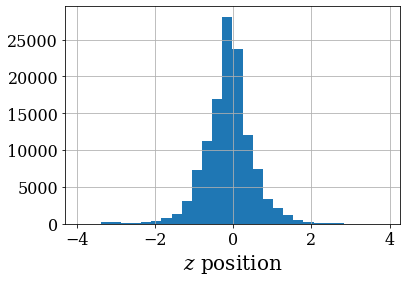

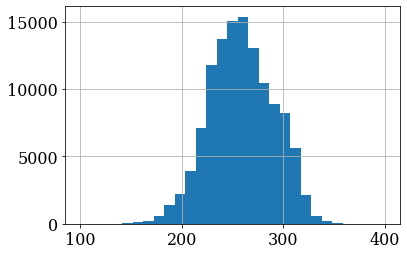

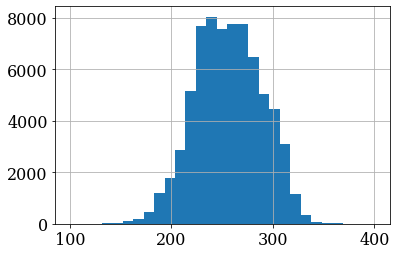

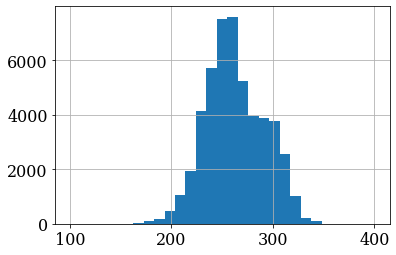

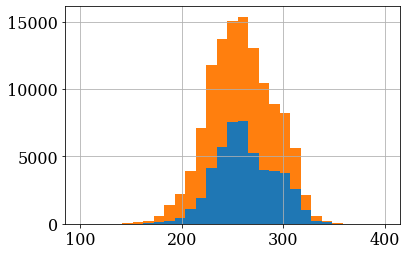

{'mass': array([7.82472455e-07, 7.07924983e-07, 7.21348158e-07, ...,
        4.75118981e-07, 4.66873900e-07, 4.84555073e-07], dtype=float128),
 'r': array([ 62.45888533,  62.97644226,  63.02443716, ..., 122.55743234,
        122.25040755, 125.04895966]),
 'v_mag': array([202.69554 , 214.67809 , 211.97862 , ...,  72.42577 ,  48.649807,
         50.262413], dtype=float32),
 'v_vec': array([[  60.60456  ,   50.590164 , -186.69012  ],
        [  36.46575  ,   53.544342 , -204.67032  ],
        [  60.345932 ,   43.39865  , -198.51917  ],
        ...,
        [ -67.50694  ,   -9.490692 ,   24.458778 ],
        [  12.882111 ,    3.9126282,  -46.74983  ],
        [  39.36238  ,   31.142532 ,   -2.6563034]], dtype=float32),
 'parttype': array(['PartType0', 'PartType0', 'PartType0', ..., 'PartType4',
        'PartType4', 'PartType4'], dtype='<U9'),
 'coord': array([[38659.85249348, 47698.6736597 , 46808.62972792],
        [38659.45492563, 47698.88697576, 46808.12174512],
        [38659.52262358,

In [8]:
compare('m12f')

# Comparing to my new data

Loading m12b


100% |########################################################################|


Loading m12c


100% |########################################################################|


Loading m12f


Loading m12i


100% |########################################################################|


Loading m12m


100% |########################################################################|


Loading m12r


Loading m12w


Loading m12z


100% |########################################################################|


Loading Romeo


100% |########################################################################|


Loading Juliet


100% |########################################################################|


Loading Romulus


100% |########################################################################|


Loading Remus


100% |########################################################################|


Loading Thelma


100% |########################################################################|


Loading Louise


100% |########################################################################|


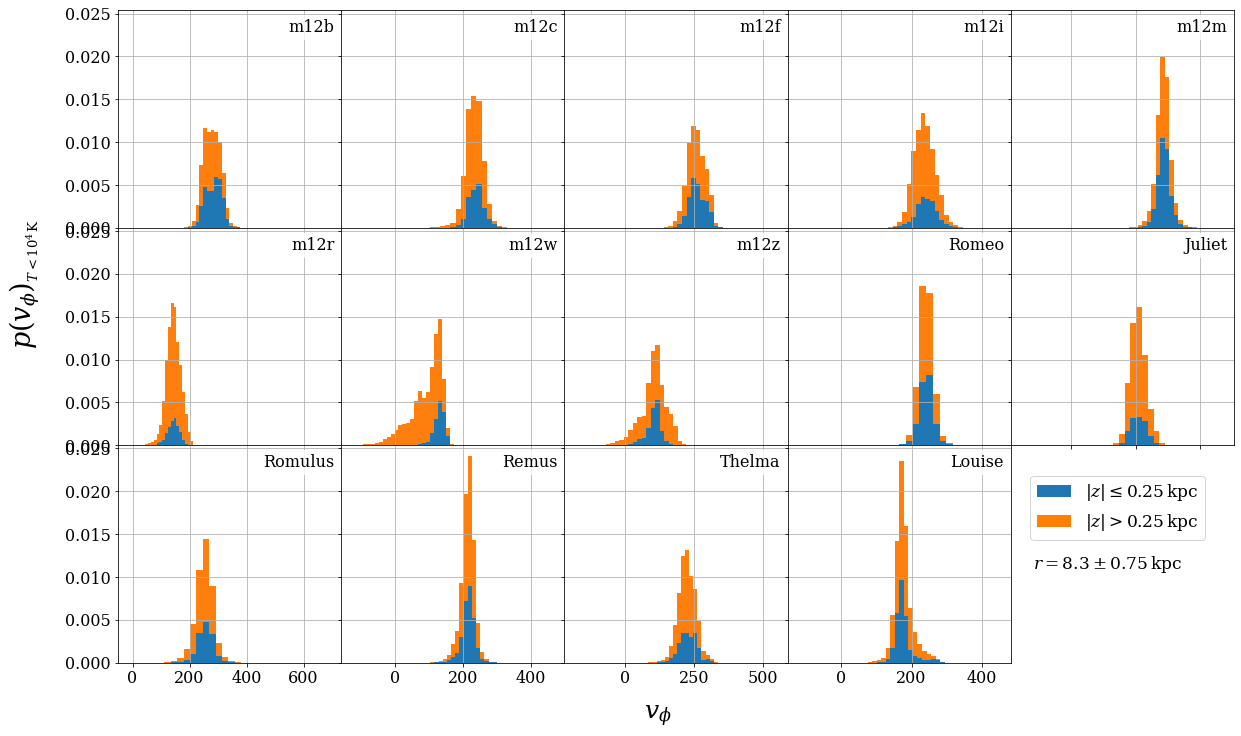

In [55]:
fig,axs=plt.subplots(3,5,figsize=(20.,12.),sharey=True,sharex='col')
axs=axs.ravel()
fig.subplots_adjust(wspace=0.,hspace=0.)

kwargs_txt = dict(fontsize=16., xycoords='axes fraction',
                  va='top', ha='right', 
                  bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

dr = df.attrs['dr']
dz = df.attrs['dz']

for i,galname in enumerate(df.index):
    gas = cropper.load_data(galname, getparts=['PartType0'])['PartType0']
    
    withinshell = (gas['r']<=8.3+dr/2.) & (gas['r']>=8.3-dr/2.)
    indisc = np.abs(gas['coord_rot'][:,2]) <= dz/2.
    iscool = gas['T']<10.**4.
    
    axs[i].hist([gas['v_dot_phihat'][withinshell&zmask&iscool] \
                 for zmask in [indisc,~indisc]], 
                bins=30, stacked=True, density=True, 
                color=['#1f77b4','#ff7f0e'])
    axs[i].annotate(galname,[0.97,0.96],**kwargs_txt)

handles = [mpl.patches.Rectangle((0,0),1,1,color=c,ec=None) \
           for c in ['#1f77b4',
                     '#ff7f03']]
labels=['$|z|\leq{0:0.2f}\,\mathrm{{kpc}}$'.format(dz/2.),
       '$|z|>{0:0.2f}\,\mathrm{{kpc}}$'.format(dz/2.)]
axs[-2].legend(handles, labels,
               bbox_to_anchor=(1.05,0.9), loc="upper left", fontsize=17)
axs[-2].annotate('$r=8.3\pm{0:0.2f}\,\mathrm{{kpc}}$\n'\
                .format(df.attrs['dr']/2.),
               (1.1, 0.5),
           xycoords='axes fraction', fontsize=17,
           horizontalalignment='left',
           verticalalignment='top')
axs[-1].remove()

fig.text(0.5,0.06,'$v_\phi$',fontsize=25, ha='center')
fig.text(0.06, 0.5, '$p(v_\phi)_{_{T<10^{4}\,\mathrm{K}}}$', 
         fontsize=27, ha='center',
         rotation='vertical')

plt.show()

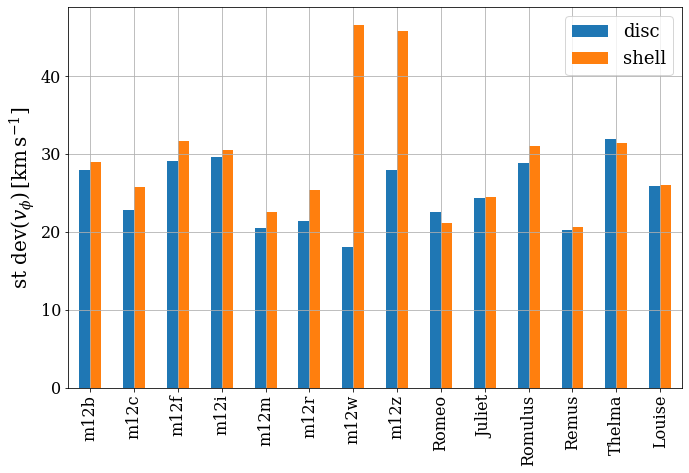

In [54]:
fig = plt.figure(figsize=(11,7))
ax = fig.add_subplot(111)
df[['std(v_dot_phihat_disc(T<=1e4))', 
         'std(v_dot_phihat_shell(T<=1e4))']].plot.bar(ax=ax)
ax.legend(['disc','shell'])
ax.set_ylabel('st dev$(v_\\phi)\,\\left[\mathrm{km\,s^{-1}}\\right]$')
plt.show()